In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [16]:
x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = 3.5
c = 0.0
y = a*(x**2) + (b*x) + c

noise = np.random.normal(0,10.,100)
y = y + noise

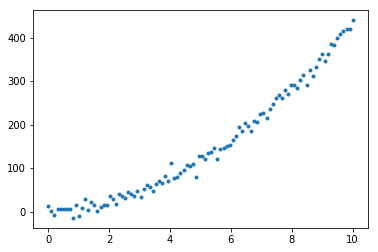

In [17]:
plt.plot(x, y, '.')

General formula of Linear Regression
<center>
    $Y = XW+e$
</center>   

 where,
- Y: true value
- $W$: the model coefficients
- $e$: some residual (or error) between the model and true values


We assume that $Y \sim N(\mu, \sigma)$ = $Y \sim N(XW, e)$. Re-written:
<br>
<center>
$\prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}\exp\{-\frac{1}{2\sigma^2}(y_i - W^tx_i)^2\}$
</center>
<br>
<center>
$\frac{1}{\sqrt{2\pi\sigma^2}}^n \exp\{-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - W^tx_i)^2\}$
</center>
In a nicer way our likelihood will be: <br>
<center>
$L(W|x_1,x_2,..,x_n) = (2\pi\sigma^2)^{\frac{n}{2}}exp\{-\frac{(Y-XW)^T(Y-XW)}{2\sigma^2}\}$
</center>

In [18]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(y_pred, y_true, n):
    error = y_true-y_pred
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

Optimization is used to determine which parameters $\beta$ maximize the log-likelihood function.<br>
So since our data originates from a second order polynomial, let’s fit a second order polynomial to the data. First we’ll have to define a function which will calculate the log likelihood value of the second order polynomial for three different coefficients (‘var’).

In [19]:
#   define my function which will return the objective function to be minimized
def myFunction(var):
    #   load my  data
    y_pred = (var[2]*(x**2)) + (var[1]*x) + var[0]
    f = calcLogLikelihood(y_pred, y, float(len(y_pred)))
    return (-1*f)

In [20]:
#  Let's pick some random starting points for the optimization    
nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 370.755750
         Iterations: 13
         Function evaluations: 110
         Gradient evaluations: 22


In [21]:
res['x']

array([0.45428494, 3.41364241, 3.99035947])

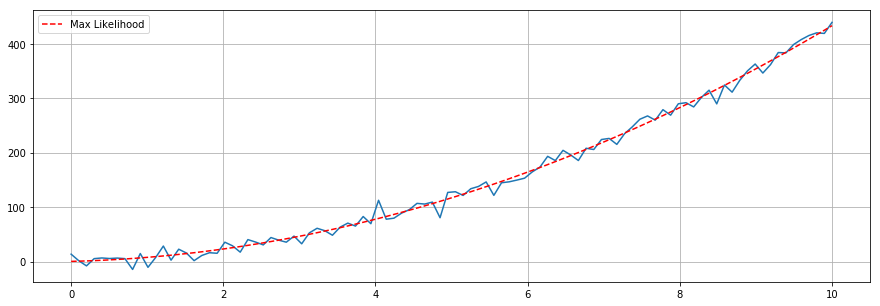

In [22]:
plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.plot(x,(res['x'][2]*(x**2)) + (res['x'][1]*x) + res['x'][0], '--r', label='Max Likelihood')
plt.grid(True)
plt.legend()
plt.show()

## Using Scikit-learn

In [23]:
# We will use the linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x[:,None], y)
y_pred = reg.predict(x[:,None])

In [24]:
from sklearn.preprocessing import PolynomialFeatures # to create y = w0x w1x^2 ...
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x[:,None])

linear_2 = LinearRegression().fit(x_poly, y)
y_pred2 = linear_2.predict(x_poly)

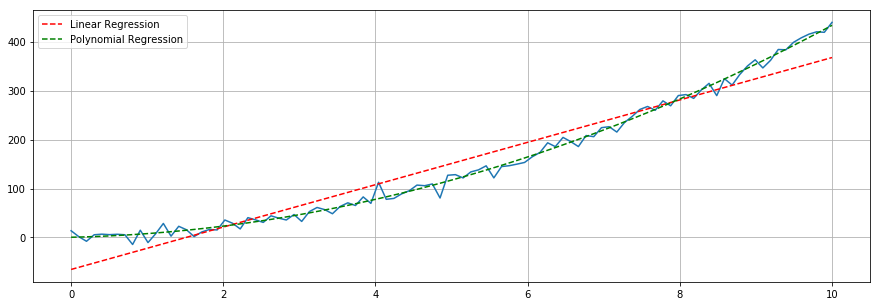

In [25]:
plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.plot(x, y_pred, '--r', label='Linear Regression')
plt.plot(x, y_pred2, '--g', label='Polynomial Regression')
plt.grid(True)
plt.legend()
plt.show()

## LASO and Ridge

In [26]:
import pandas as pd
from IPython.display import display, HTML

In [27]:
from sklearn.datasets import load_boston
try:
    from sklearn.cross_validation import train_test_split
except:
    from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [28]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [30]:
newX=boston_df.drop('Price',axis=1)
display(newX[0:3]) 

newY=boston_df['Price']
display(newY.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [33]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))

152 152


### Fitting the models

In [34]:
#LINEAR MODEL
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# SMOOTH RIDGE]
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
#RIDGE MORE RESTRICTIVE
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
Linear_train_score=lr.score(X_train, y_train)
Lineartest_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [41]:
print ("linear regression train score:", Linear_train_score)
print ("linear regression test score:", Lineartest_score)
print ('-'*20)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ('-'*20)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576885
--------------------
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123909
--------------------
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921937


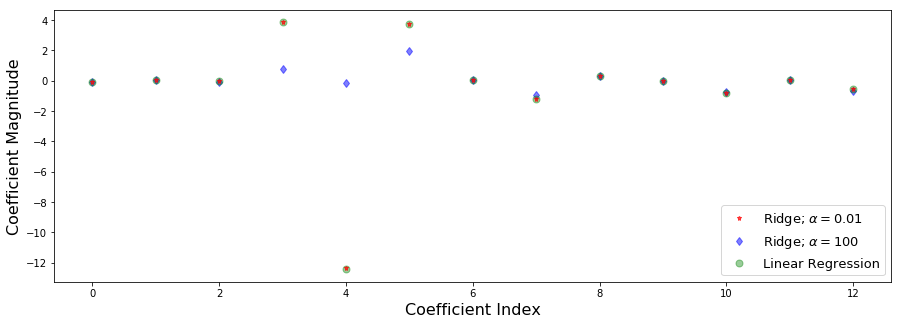

In [42]:
plt.figure(figsize=(15,5))
plt.plot(rr.coef_ ,alpha=0.7, linestyle='none',
         marker='*',markersize=5,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

plt.plot(rr100.coef_,alpha=0.5,linestyle='none',
         marker='d',markersize=6,color='blue',
         label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

plt.plot(lr.coef_,alpha=0.4,linestyle='none',
         marker='o',markersize=7,color='green',
         label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### LASSO 

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
coeff_used_rr = np.sum(rr.coef_!=0)

print ("training score:", train_score )
print ("test score: ", test_score)
print ('-'*20)
print ("number of features used (LASSO): ", coeff_used)
print (r'number of features used (ridge alpha = 0.01) :', coeff_used_rr)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)


training score: 0.6832133784853487
test score:  0.6364462662362061
--------------------
number of features used (LASSO):  11
number of features used (ridge alpha = 0.01) : 13


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [51]:
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7419034541315459
test score for alpha =0.0001:  0.7147428283500774
number of features used: for alpha =0.0001: 13


## Choosing the best alpha

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [55]:
scaler = StandardScaler()
X_std = scaler.fit_transform(newX)

In [56]:
alphs

array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1])

In [57]:
# Create ridge regression with three possible alpha values
alphs = np.arange(0.1, 10)
ridge_cv = RidgeCV(alphas=alphs)
lasso_cv = LassoCV(alphas=alphs)

In [58]:
# Fit the linear regression
model_ridge = ridge_cv.fit(X_std, newY)
model_lasso = lasso_cv.fit(X_std, newY)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [60]:
# View alpha
print ('Best alpha ridge: ',model_ridge.alpha_)
print ('Best alpha lasso: ',model_lasso.alpha_)

Best alpha ridge:  5.1
Best alpha lasso:  0.1


In [61]:
model_ridge.score(X_std, newY)

0.7403751076365399

## EXERCISE

Using one of the above methods, perform the regression for cancer data. Justify

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
display(cancer_df.head(3))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [65]:
X = cancer.data
Y = cancer.target

In [ ]:
# split the dataset 

In [66]:
X.shape

(569, 30)

In [67]:
newX.shape

(506, 13)